In [1]:
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import pandas as pd
import numpy as np
import pickle
import random
import heapq
import sys
import os

from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
root_path = 'E:\\Tasks\\08. Task Allocation with TCC'
code_path = os.path.join(root_path, 'Codes')
results_path = os.path.join(root_path, 'Resuts')

simulated_annealing_path = os.path.join(results_path, "simulated_annealing")
single_simulated_annealing_path = os.path.join(results_path, "single_simulated_annealing")
random_path = os.path.join(results_path, "random")
greedy_path = os.path.join(results_path, "greedy")

sys.path.insert(0,code_path)
from Configuration import save_object, load_object

In [4]:
def plot_2d_function(object_list, methods_names, save_path):
    plt.figure()
    plt.scatter(object_list[0], object_list[1], c='b')
    plt.xlabel(methods_names[0])
    plt.ylabel(methods_names[1])
    plt.legend('')
    plt.savefig(os.path.join(save_path , methods_names[0] + " & "+ methods_names[1] + ".png"))
    plt.savefig(os.path.join(save_path, methods_names[0] + " & "+ methods_names[1]  + '.svg'), format='svg')
    plt.show()

In [5]:
import plotly.graph_objs as go
def plot_3d_function(object_list, objectives_names):
    fig = go.Figure(data=[go.Scatter3d(x=object_list[0], y=object_list[1], z=object_list[2], mode='markers', marker=dict(size=3))])
    fig.update_layout(scene=dict(xaxis_title=objectives_names[0], yaxis_title=objectives_names[1], zaxis_title=objectives_names[2],
                                aspectratio=dict(x=1, y=1, z=1.5)))
    fig.update_layout(width=900, height=700)
    fig.show()

def plot_1d_function(input_list, objective, save_path):
    plt.plot(input_list)
    plt.xlabel('Iteration')
    plt.ylabel('Value')
    plt.title('')
    plt.grid(True)
    plt.savefig(os.path.join(save_path , objective + '_.png'))
    plt.savefig(os.path.join(save_path, objective + '.svg'), format='svg')
    plt.show()

In [6]:
def Plot_convergence(fronts, objective_name, methods_names, save_path, x_axis_name='Time Step'):
    plt.figure(figsize=(16, 12))
    for i, obj in enumerate(fronts):
        plt.plot(range(1, len(obj) + 1), obj, label=methods_names[i])
    plt.xlabel(x_axis_name)
    plt.ylabel(objective_name)
    # plt.title('')
    plt.legend()
    plt.savefig(os.path.join(save_path , objective_name + '_convergence.png'))
    plt.savefig(os.path.join(save_path, objective_name + '_convergence.svg'), format='svg')
    plt.show()

In [7]:
def box_plot(fronts, objective_name, methods_names, save_path):
    plt.figure(figsize=(16, 12))
    plt.boxplot(fronts, labels=methods_names)
    plt.xlabel('Algorithm')
    plt.ylabel('Values')
    plt.title(objective_name + ' Box Plot')
    plt.savefig(os.path.join(save_path, objective_name + '_Box_plot.png'))
    plt.savefig(os.path.join(save_path, objective_name + '_Box_plot.svg'), format='svg')
    plt.show()

In [8]:
def Scatter_Plot_of_Pareto_Fronts(front, objectives_name, methods_name, save_path):
    plt.scatter([*range(len(front))], front, label=methods_name)
    plt.ylabel(objectives_name)
    plt.xlabel("Iteration")
    plt.legend()
    plt.title(methods_name)
    plt.savefig(os.path.join(save_path , methods_name+'_Scatter_Plot.png'))
    plt.savefig(os.path.join(save_path, methods_name+'_Scatter_Plot.svg'), format='svg')
    plt.show()

In [9]:
def normalize(values):
    min_val = min(values)
    max_val = max(values)    
    if min_val == max_val:
        return [0.5] * len(values)
    return [((val - min_val) / (max_val - min_val))*100 for val in values]

In [10]:
def select_the_best_three_objective(objectives):
  obj1 = [x[0] for x in objectives]
  obj2 = [x[1] for x in objectives]
  obj3 = [x[2] for x in objectives]
  return objectives[obj1.index(min(obj1))], objectives[obj2.index(min(obj2))], objectives[obj3.index(min(obj3))]

In [11]:
single_simulated_annealing_obj1, single_simulated_annealing_obj2, single_simulated_annealing_obj3 = [], [], []
simulated_annealing_obj1, simulated_annealing_obj2, simulated_annealing_obj3 = [], [], []
random_obj1, random_obj2, random_obj3 = [], [], []
greedy_obj1, greedy_obj2, greedy_obj3 = [], [], []

objectives_names = ['Execution Time', 'Energy Distribution', 'Active nodes']
methods_names = ['Simulated Annealing', 'Single Simulated Annealing', 'Random', 'Greedy']

numer_of_steps = 50
# execution_time_distribution, energy_distribution, number_of_active_nodes
for t in tqdm(range(numer_of_steps)):

  objective_values = load_object('objective_values_'+str(t), simulated_annealing_path)
  obj1, obj2, obj3 = select_the_best_three_objective(objective_values)
  simulated_annealing_obj1.append(obj1)
  simulated_annealing_obj2.append(obj2)
  simulated_annealing_obj3.append(obj3)

  single_objective_values = load_object('objective_values_'+str(t), single_simulated_annealing_path)
  single_objective_values = [(y[1], y[2], y[3]) for y in single_objective_values]
  obj1, obj2, obj3 = select_the_best_three_objective(single_objective_values)
  single_simulated_annealing_obj1.append(obj1)
  single_simulated_annealing_obj3.append(obj2)
  single_simulated_annealing_obj2.append(obj3)

  random_objective_values = load_object('objective_values_'+str(t), random_path)
  obj1, obj2, obj3 = select_the_best_three_objective(random_objective_values)
  random_obj1.append(obj1)
  random_obj2.append(obj2)
  random_obj3.append(obj3)

  greedy_objective_values = load_object('objective_values_'+str(t), greedy_path)
  obj1, obj2, obj3 = select_the_best_three_objective(greedy_objective_values)
  greedy_obj1.append(obj1)
  greedy_obj2.append(obj2)
  greedy_obj3.append(obj3)

df1 = pd.DataFrame(simulated_annealing_obj1, columns=objectives_names)
df1.to_csv(os.path.join(simulated_annealing_path, objectives_names[0]+'.csv'), index=False)
df2 = pd.DataFrame(simulated_annealing_obj2, columns=objectives_names)
df2.to_csv(os.path.join(simulated_annealing_path, objectives_names[1]+'.csv'), index=False)
df3 = pd.DataFrame(simulated_annealing_obj3, columns=objectives_names)
df3.to_csv(os.path.join(simulated_annealing_path, objectives_names[2]+'.csv'), index=False)

# df1 = pd.read_csv(os.path.join(simulated_annealing_path, objectives_names[0]+'.csv'))
# df2 = pd.read_csv(os.path.join(simulated_annealing_path, objectives_names[1]+'.csv'))
# df3 = pd.read_csv(os.path.join(simulated_annealing_path, objectives_names[2]+'.csv'))


df4 = pd.DataFrame(single_simulated_annealing_obj1, columns=objectives_names)
df4.to_csv(os.path.join(single_simulated_annealing_path, objectives_names[0]+'.csv'), index=False)
df5 = pd.DataFrame(single_simulated_annealing_obj2, columns=objectives_names)
df5.to_csv(os.path.join(single_simulated_annealing_path, objectives_names[1]+'.csv'), index=False)
df6 = pd.DataFrame(single_simulated_annealing_obj3, columns=objectives_names)
df6.to_csv(os.path.join(single_simulated_annealing_path, objectives_names[2]+'.csv'), index=False)

# df4 = pd.read_csv(os.path.join(single_simulated_annealing_path, objectives_names[0]+'.csv'))
# df5 = pd.read_csv(os.path.join(single_simulated_annealing_path, objectives_names[1]+'.csv'))
# df6 = pd.read_csv(os.path.join(single_simulated_annealing_path, objectives_names[2]+'.csv'))

df7 = pd.DataFrame(random_obj1, columns=objectives_names)
df7.to_csv(os.path.join(random_path, objectives_names[0]+'.csv'), index=False)
df8 = pd.DataFrame(random_obj2, columns=objectives_names)
df8.to_csv(os.path.join(random_path, objectives_names[1]+'.csv'), index=False)
df9 = pd.DataFrame(random_obj3, columns=objectives_names)
df9.to_csv(os.path.join(random_path, objectives_names[2]+'.csv'), index=False)

# df7 = pd.read_csv(os.path.join(random_path, objectives_names[0]+'.csv'))
# df8 = pd.read_csv(os.path.join(random_path, objectives_names[1]+'.csv'))
# df9 = pd.read_csv(os.path.join(random_path, objectives_names[2]+'.csv'))


df10 = pd.DataFrame(greedy_obj1, columns=objectives_names)
df10.to_csv(os.path.join(greedy_path, objectives_names[0]+'.csv'), index=False)
df11 = pd.DataFrame(greedy_obj2, columns=objectives_names)
df11.to_csv(os.path.join(greedy_path, objectives_names[1]+'.csv'), index=False)
df12 = pd.DataFrame(greedy_obj3, columns=objectives_names)
df12.to_csv(os.path.join(greedy_path, objectives_names[2]+'.csv'), index=False)


# df10 = pd.read_csv(os.path.join(greedy_path, objectives_names[0]+'.csv'))
# df11 = pd.read_csv(os.path.join(greedy_path, objectives_names[1]+'.csv'))
# df12 = pd.read_csv(os.path.join(greedy_path, objectives_names[2]+'.csv'))

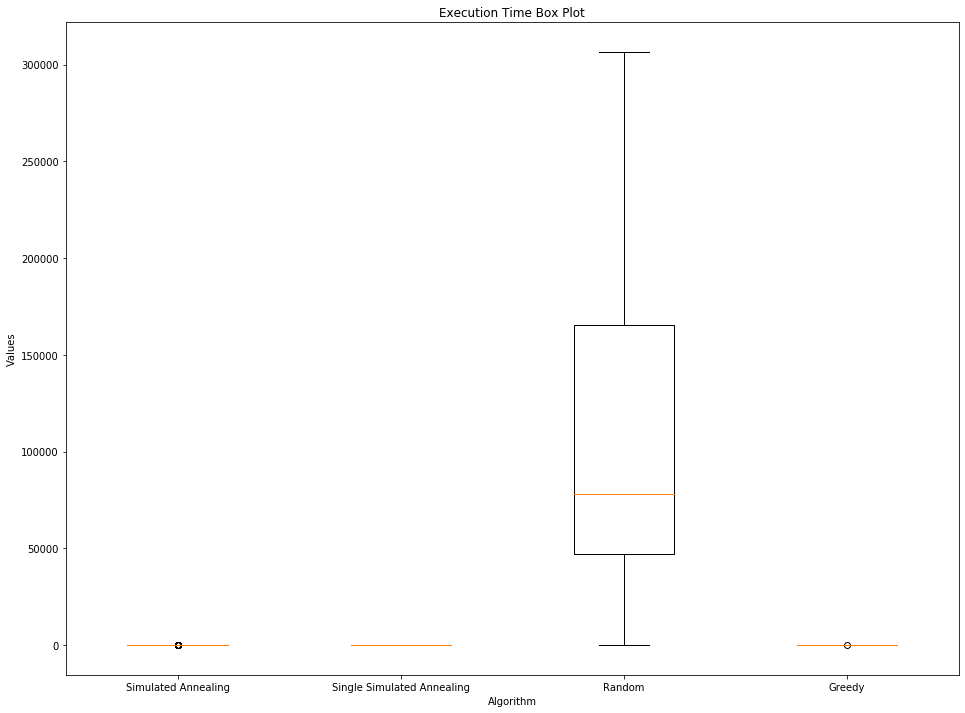

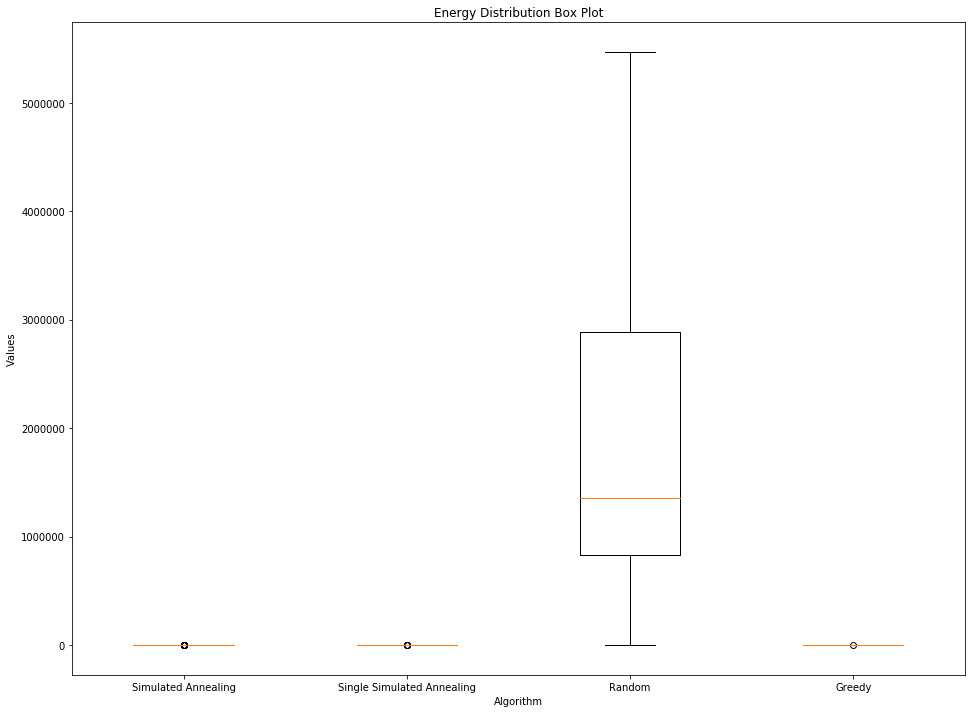

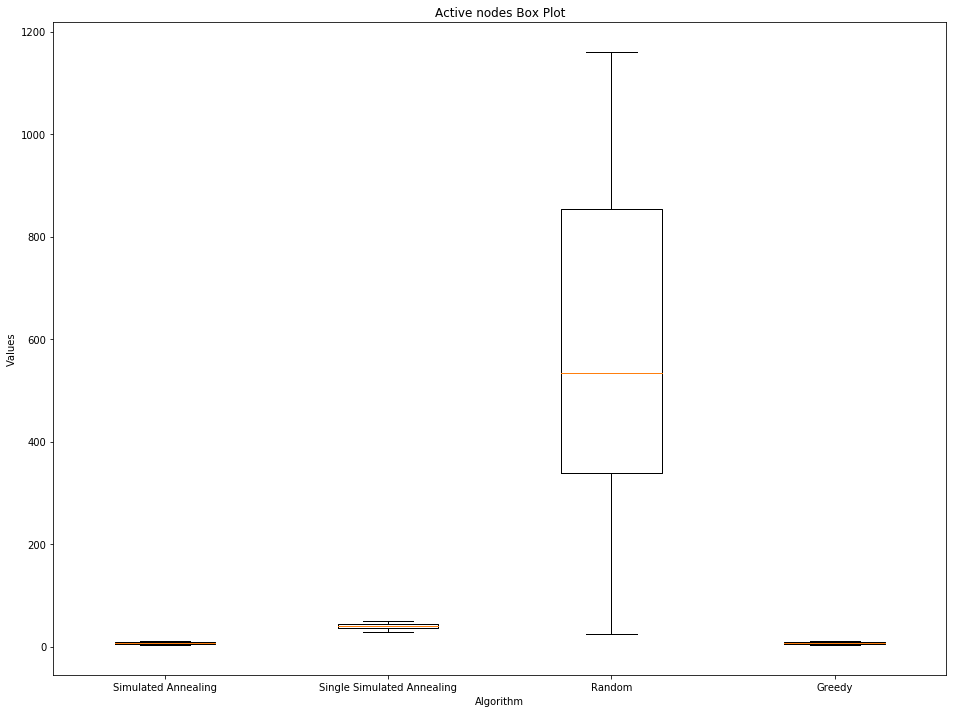

In [12]:
box_plot([df1[objectives_names[0]].tolist(), df4[objectives_names[0]].tolist(), df7[objectives_names[0]].tolist(), df10[objectives_names[0]].tolist()], objectives_names[0], methods_names, results_path)
box_plot([df2[objectives_names[1]].tolist(), df5[objectives_names[1]].tolist(), df8[objectives_names[1]].tolist(), df11[objectives_names[1]].tolist()], objectives_names[1], methods_names, results_path)
box_plot([df3[objectives_names[2]].tolist(), df6[objectives_names[2]].tolist(), df9[objectives_names[2]].tolist(), df12[objectives_names[2]].tolist()], objectives_names[2], methods_names, results_path)

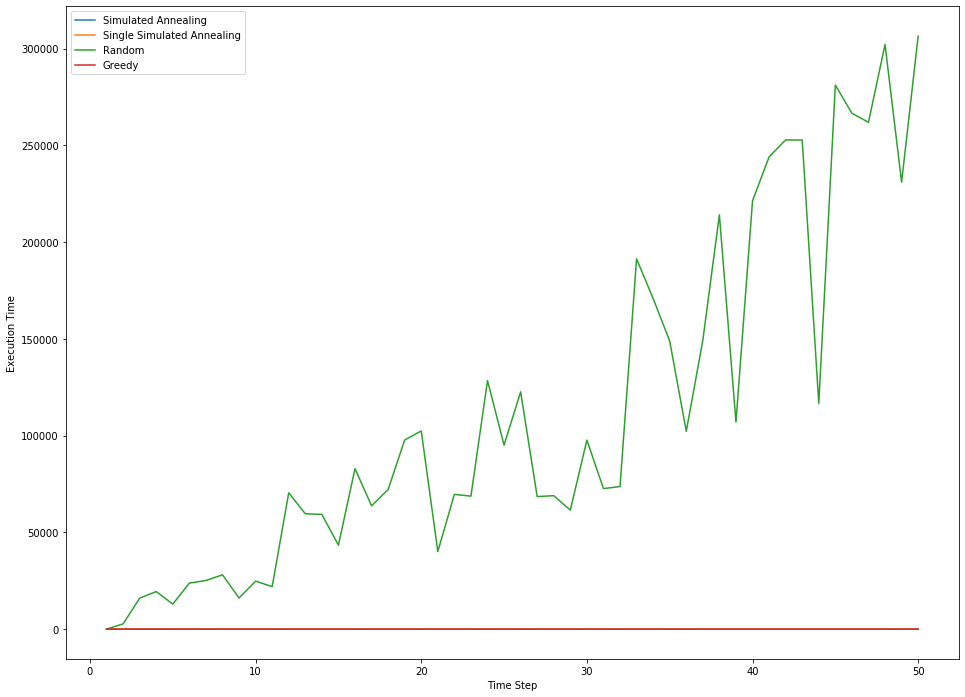

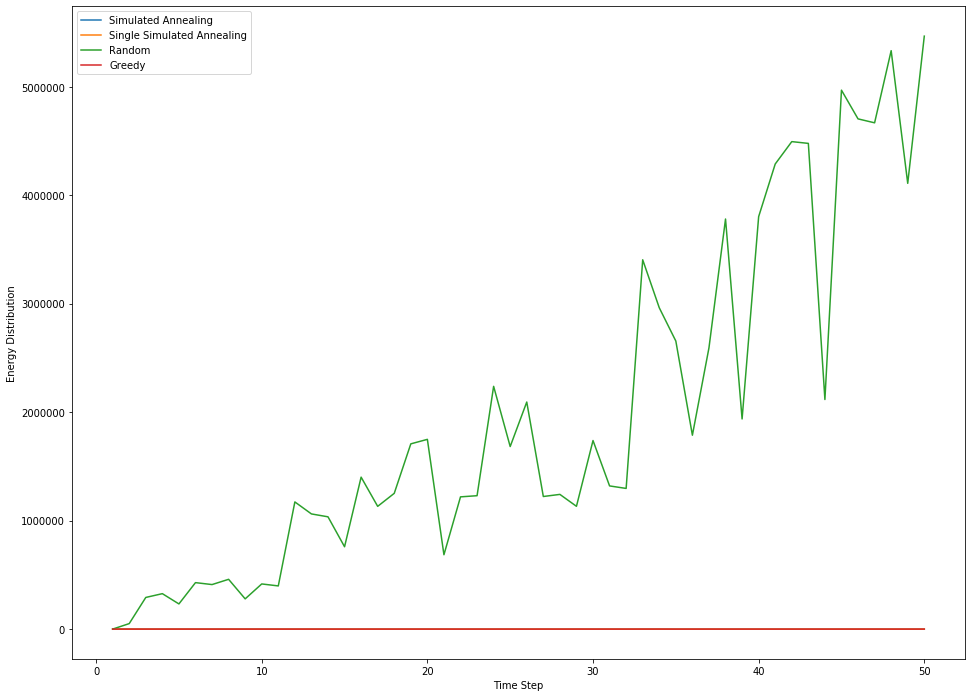

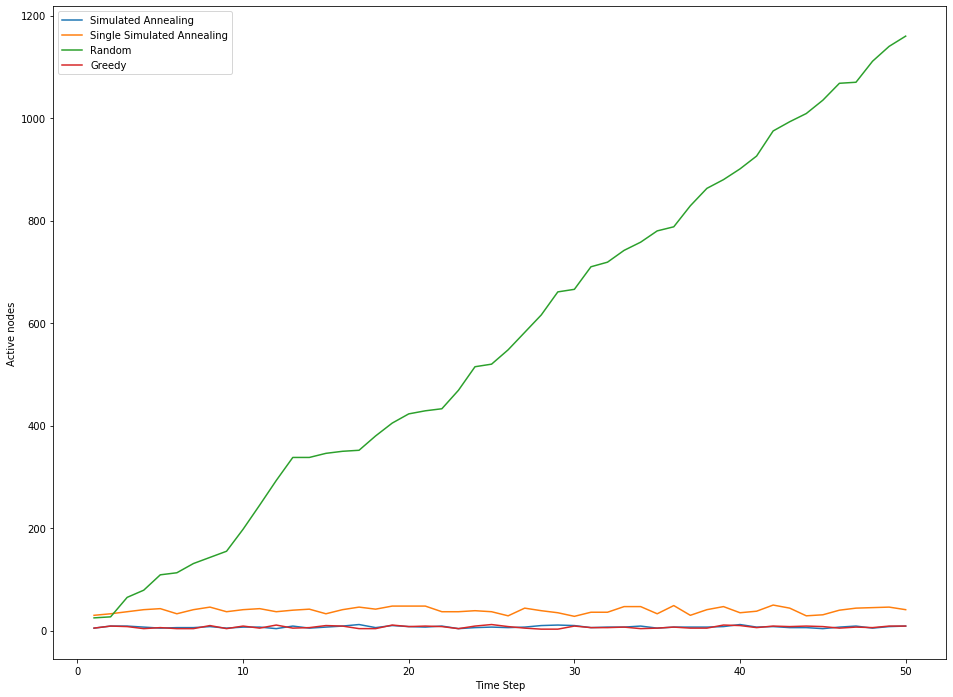

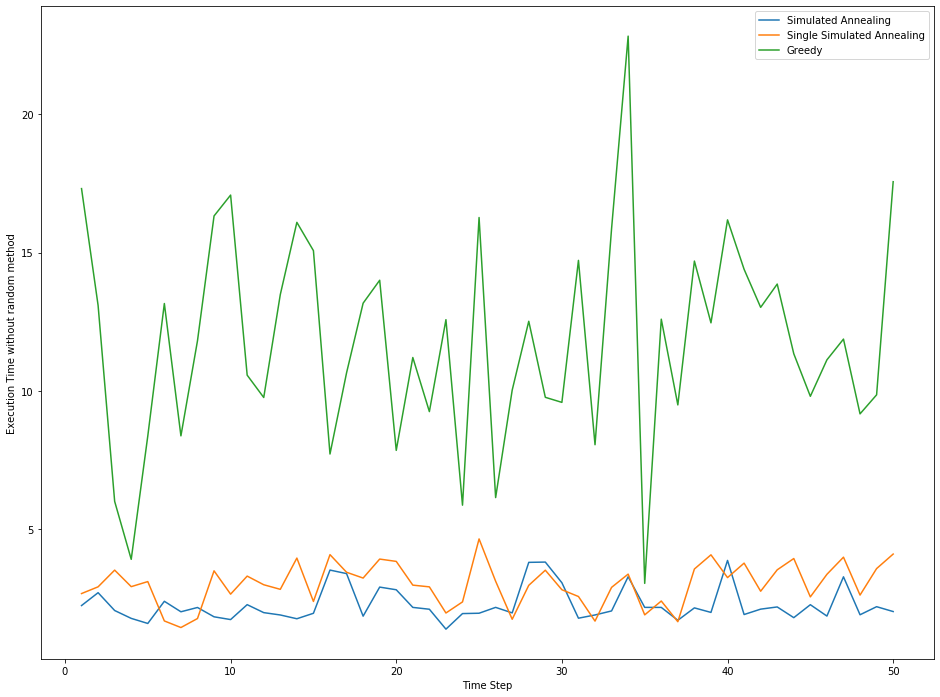

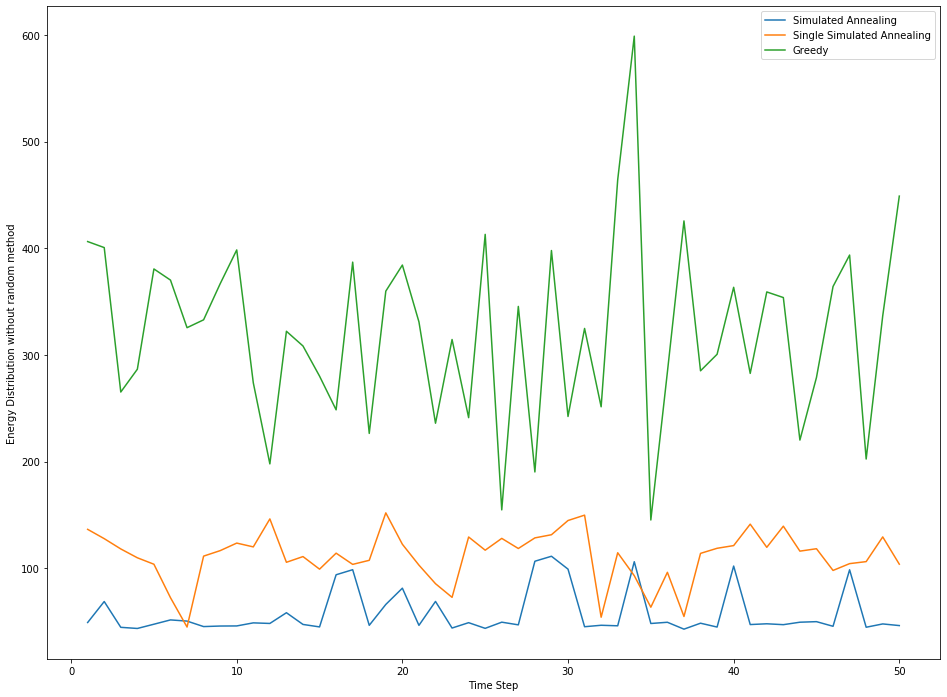

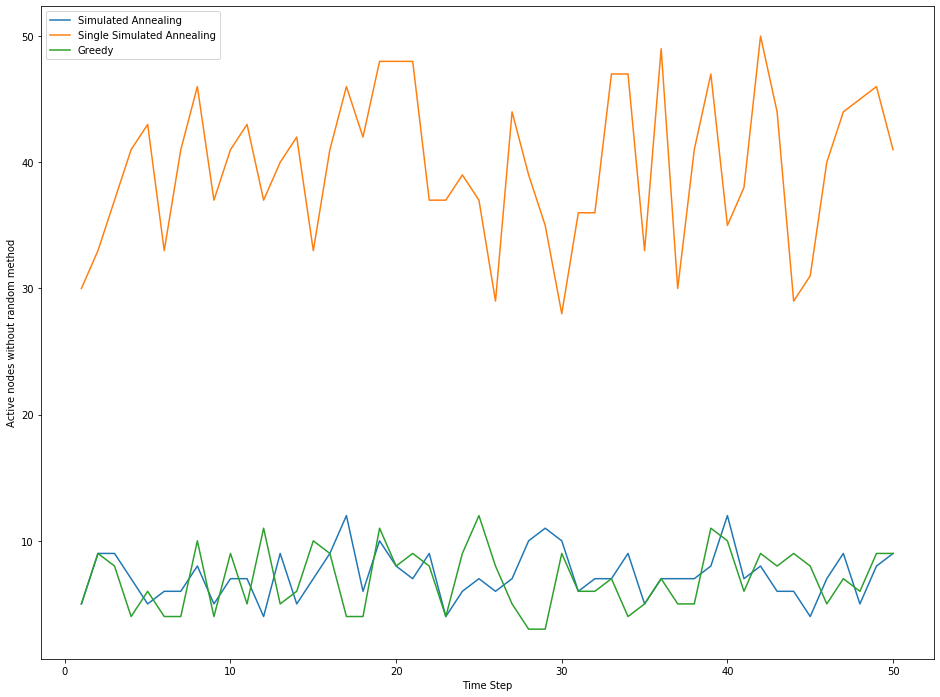

In [13]:
Plot_convergence([df1[objectives_names[0]].tolist(), df4[objectives_names[0]].tolist(), df7[objectives_names[0]].tolist(), df10[objectives_names[0]].tolist()], objectives_names[0], methods_names, results_path)
Plot_convergence([df2[objectives_names[1]].tolist(), df5[objectives_names[1]].tolist(), df8[objectives_names[1]].tolist(), df11[objectives_names[1]].tolist()], objectives_names[1], methods_names, results_path)
Plot_convergence([df3[objectives_names[2]].tolist(), df6[objectives_names[2]].tolist(), df9[objectives_names[2]].tolist(), df12[objectives_names[2]].tolist()], objectives_names[2], methods_names, results_path)

methods_names_ = [methods_names[0], methods_names[1], methods_names[3]]
Plot_convergence([df1[objectives_names[0]].tolist(), df4[objectives_names[0]].tolist(), df10[objectives_names[0]].tolist()], objectives_names[0]+' without random method', methods_names_, results_path)
Plot_convergence([df2[objectives_names[1]].tolist(), df5[objectives_names[1]].tolist(), df11[objectives_names[1]].tolist()], objectives_names[1]+' without random method', methods_names_, results_path)
Plot_convergence([df3[objectives_names[2]].tolist(), df6[objectives_names[2]].tolist(), df12[objectives_names[2]].tolist()], objectives_names[2]+' without random method', methods_names_, results_path)

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Simulate some data for demonstration
np.random.seed(0)
objective_values = load_object('objective_values_'+str(6), simulated_annealing_path)
df = pd.DataFrame(objective_values, columns=objectives_names)

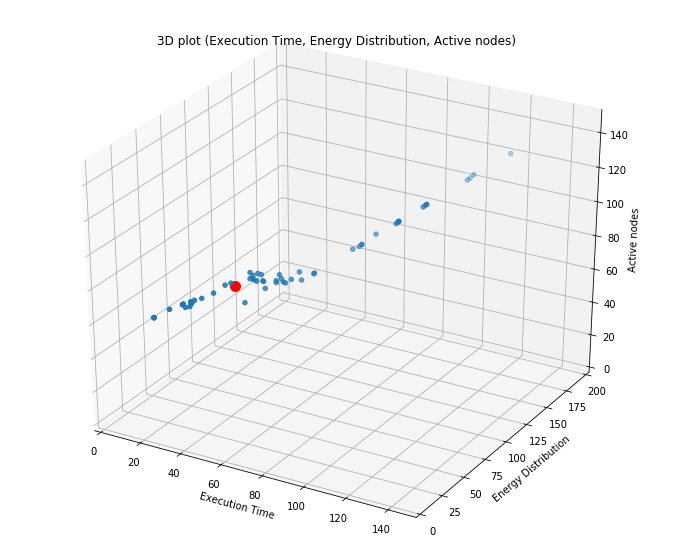

In [33]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import clear_output
import numpy as np
import time

data = objective_values
for i in range(len(data)):
    x = [t[0] for t in data[:i+1]]
    y = [t[1] for t in data[:i+1]]
    z = [t[2] for t in data[:i+1]]
    fig = plt.figure(figsize=(26, 10))
    ax = fig.add_subplot(121, projection='3d')
    # scatter = ax.scatter(x, y, z, cmap='viridis')
    # fig.colorbar(scatter, ax=ax, label='W')
    scatter = ax.scatter(x[:-1], y[:-1], z[:-1], cmap='viridis')
    # Plot the last point in red
    ax.scatter(x[-1], y[-1], z[-1], color='red', s=100)

    ax.set_title(f"3D plot ({objectives_names[0]}, {objectives_names[1]}, {objectives_names[2]})")
    ax.set_xlabel(objectives_names[0])
    ax.set_ylabel(objectives_names[1])
    ax.set_zlabel(objectives_names[2])
    ax.set_xlim(0, 150)
    ax.set_ylim(0, 200)
    ax.set_zlim(0, 150)
    clear_output(wait=True)
    plt.show()
    time.sleep(0.1)

In [ ]:
objective_values = load_object('objective_values_'+str(4), simulated_annealing_path)

obj1 = [x[0] for x in objective_values]
obj2 = [x[1] for x in objective_values]
obj3 = [x[2] for x in objective_values]

plot_3d_function([obj1, obj2, obj3], objectives_names)

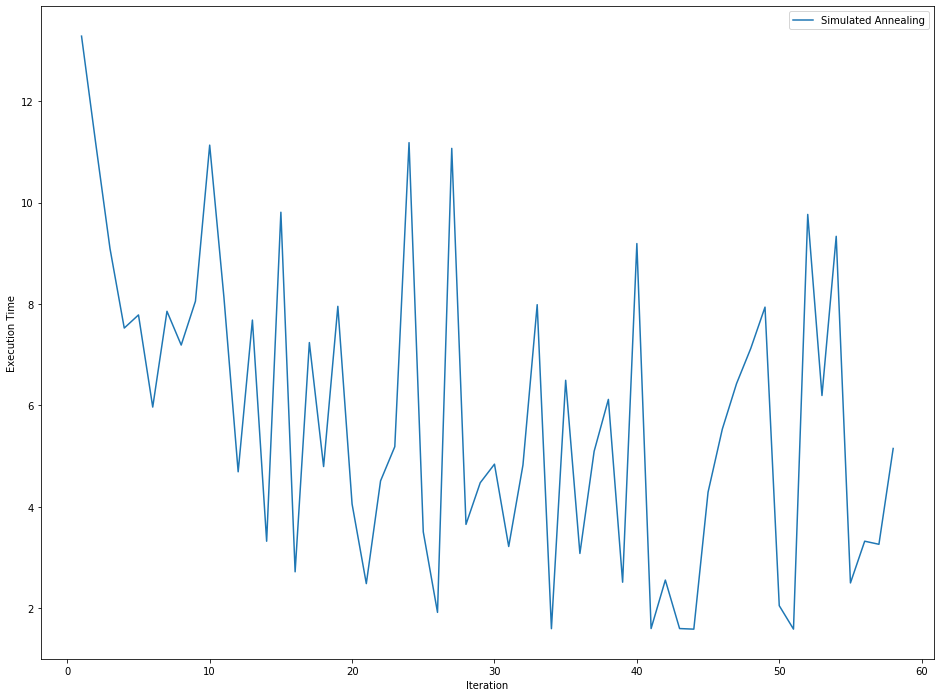

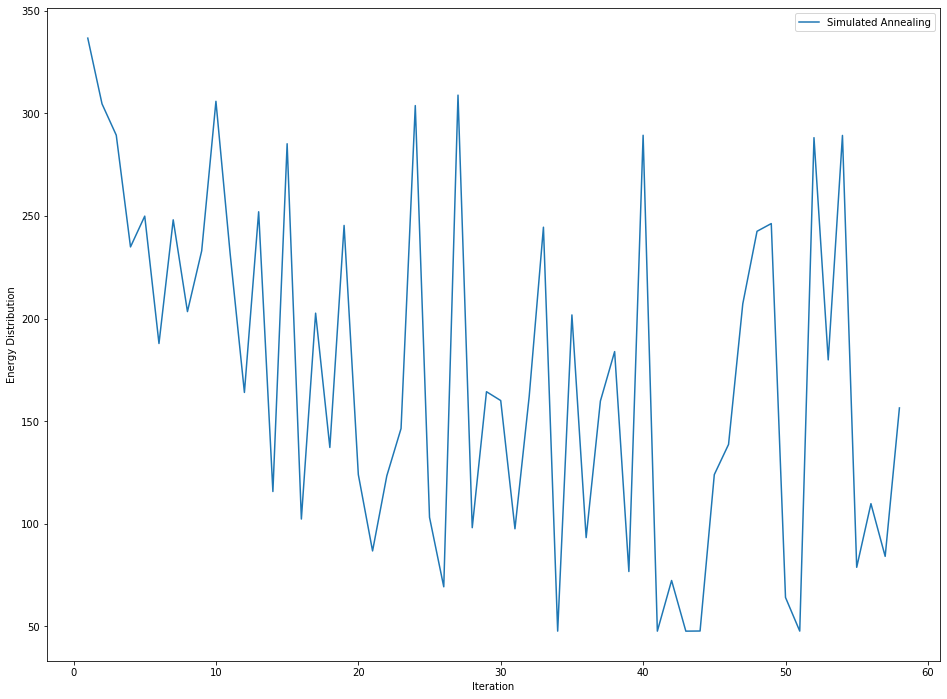

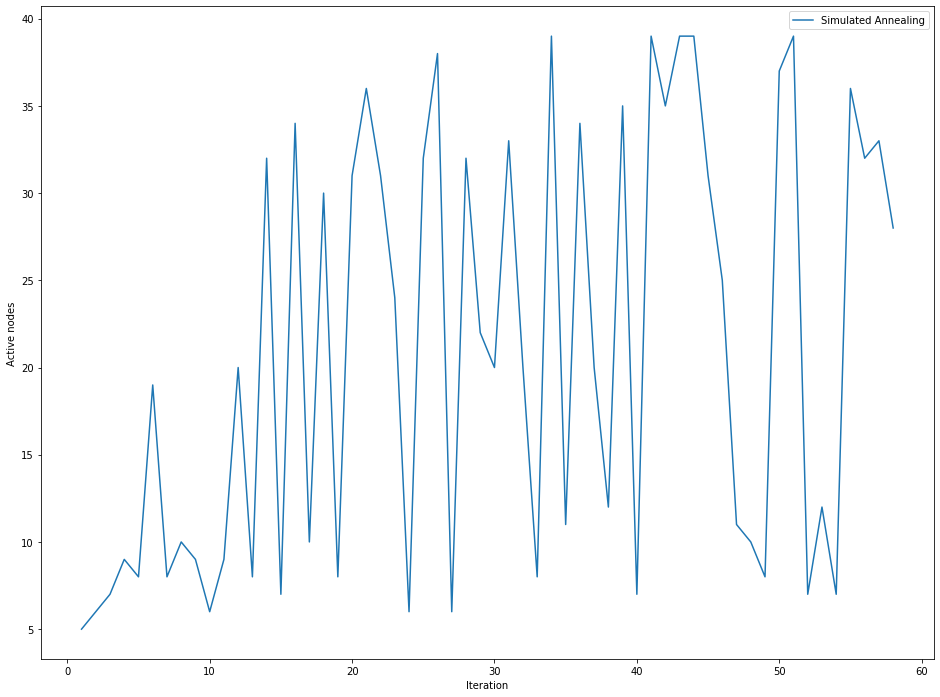

In [ ]:
Plot_convergence([obj1], objectives_names[0], [methods_names[0]], simulated_annealing_path, x_axis_name='Iteration')
Plot_convergence([obj2], objectives_names[1], [methods_names[0]], simulated_annealing_path, x_axis_name='Iteration')
Plot_convergence([obj3], objectives_names[2], [methods_names[0]], simulated_annealing_path, x_axis_name='Iteration')

In [ ]:
objective_values = load_object('objective_values_'+str(6), simulated_annealing_path)

obj1 = [x[0] for x in objective_values]
obj2 = [x[1] for x in objective_values]
obj3 = [x[2] for x in objective_values]

plot_3d_function([obj1, obj2, obj3], objectives_names)

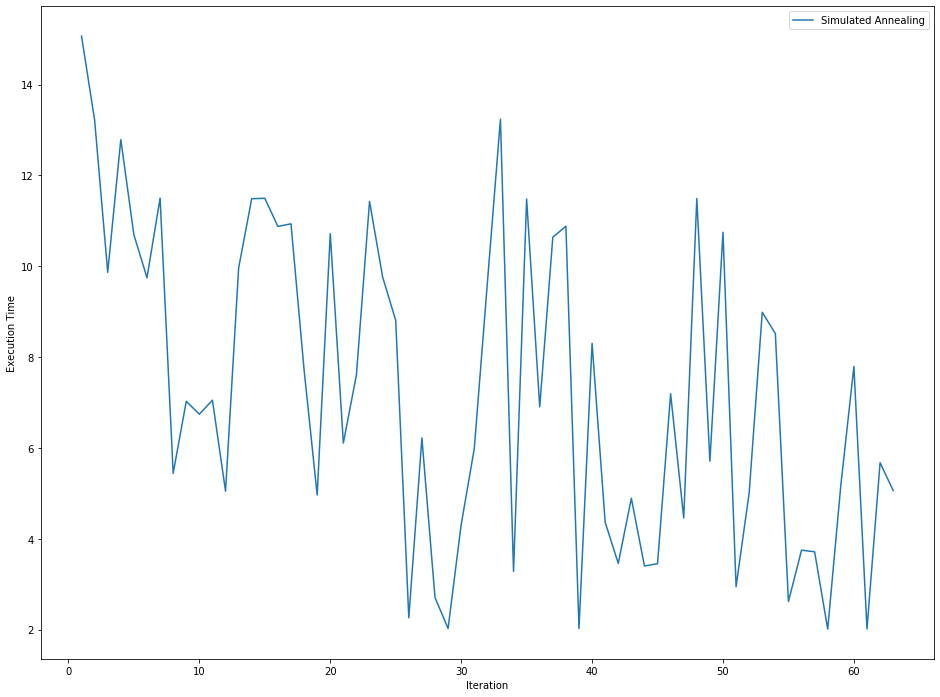

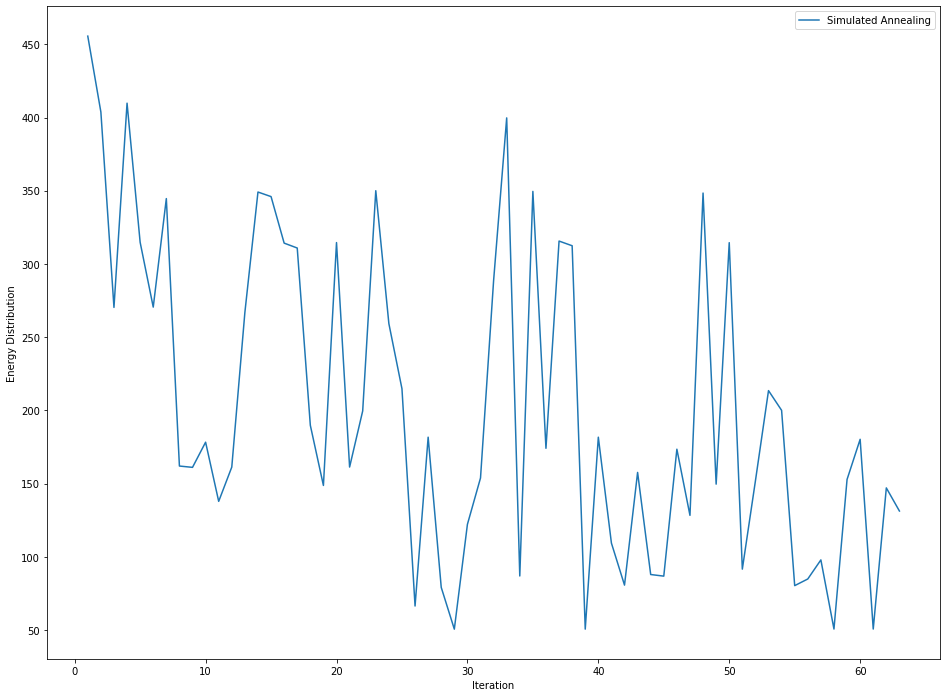

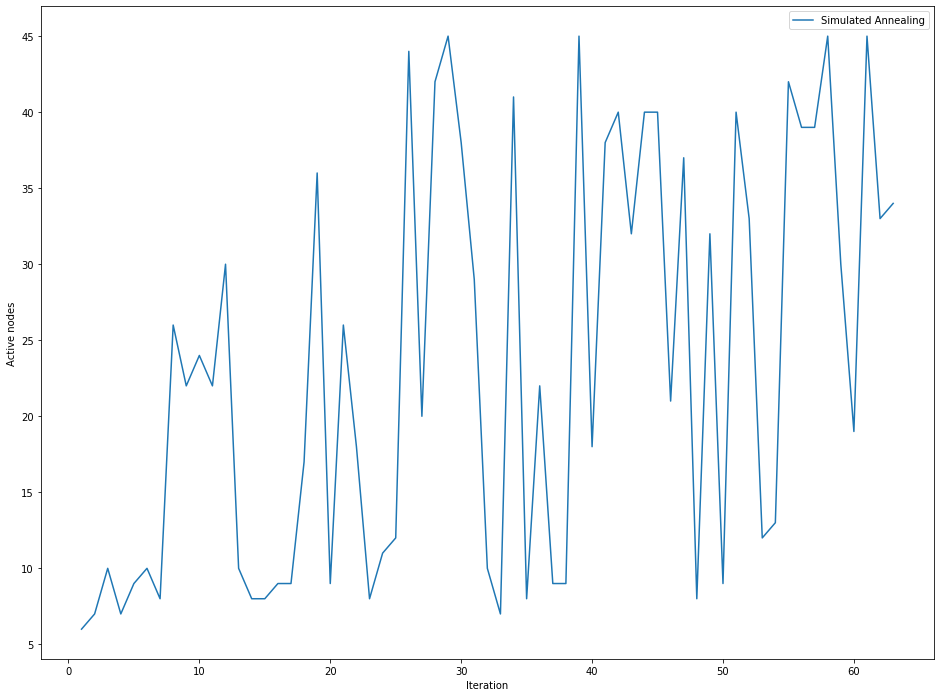

In [ ]:
Plot_convergence([obj1], objectives_names[0], [methods_names[0]], simulated_annealing_path, x_axis_name='Iteration')
Plot_convergence([obj2], objectives_names[1], [methods_names[0]], simulated_annealing_path, x_axis_name='Iteration')
Plot_convergence([obj3], objectives_names[2], [methods_names[0]], simulated_annealing_path, x_axis_name='Iteration')